## Analyzing Child Blood Lead Levels

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import folium

In [2]:
tracts = gpd.read_file('child_blood_lead_levels_by_ct.geojson')

In [3]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   census_tract   380 non-null    object  
 1   data_redacted  380 non-null    bool    
 2   num_bll_5plus  251 non-null    float64 
 3   num_screen     372 non-null    float64 
 4   perc_5plus     254 non-null    float64 
 5   geometry       380 non-null    geometry
dtypes: bool(1), float64(3), geometry(1), object(1)
memory usage: 15.3+ KB


In [4]:
tracts.head()

,census_tract,data_redacted,num_bll_5plus,num_screen,perc_5plus,geometry
0,42101000100,False,0.0,100.0,0.0,"POLYGON ((-75.14147 39.95171, -75.14150 39.951..."
1,42101000200,True,NaN,109.0,NaN,"POLYGON ((-75.16238 39.95766, -75.16236 39.957..."
2,42101000300,True,NaN,110.0,NaN,"POLYGON ((-75.17821 39.95981, -75.17743 39.959..."
3,42101000401,True,NaN,61.0,NaN,"POLYGON ((-75.17299 39.95464, -75.17301 39.954..."
4,42101000402,False,0.0,41.0,0.0,"POLYGON ((-75.16333 39.95334, -75.16340 39.953..."


In [ ]:
df = pd.read_csv('child_blood_lead_levels_by_ct.csv')

In [ ]:
cblldata.info()

In [ ]:
cblldata.head()

In [ ]:
# renaming columns

In [ ]:
columns = list(cblldata)
columns

In [ ]:
#keeping the same sequence, now renaming the columns
cblldata.columns = ['census tracts',
               'redacted data',
               'bll >5',
               'number of children screened',
               'percent of children with bll >5',
              ]

In [ ]:
cblldata.sample(5)

In [ ]:
cblldata.describe()

In [ ]:
cblldata['census_tract'] = cblldata['census_tract'].astype('str')

In [ ]:
cblldata.info()

In [ ]:
cblldata.plot()

In [ ]:
#generating a scatter plot looking at mentally unhealthy days/month against air pollution particulate matter.
cblldata.plot.scatter(x='number of children screened', y='percent of children with bll >5')

## CENSUS TRACTS

In [6]:
tracts['census_tract'] = tracts['census_tract'].astype('str')

In [7]:
columns = list(tracts)
columns

['census_tract',
 'data_redacted',
 'num_bll_5plus',
 'num_screen',
 'perc_5plus',
 'geometry']

In [8]:
#keeping the same sequence, now renaming the columns
tracts.columns = ['census tracts',
               'redacted data',
               'bll >5',
               'number of children screened',
               'percent of children with bll >5',
               'geometry',
              ]

In [9]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   census tracts                    380 non-null    object  
 1   redacted data                    380 non-null    bool    
 2   bll >5                           251 non-null    float64 
 3   number of children screened      372 non-null    float64 
 4   percent of children with bll >5  254 non-null    float64 
 5   geometry                         380 non-null    geometry
dtypes: bool(1), float64(3), geometry(1), object(1)
memory usage: 15.3+ KB


In [10]:
# create a FIPS column
tracts['FIPS'] ='42' + '101' + tracts['census tracts']

In [12]:
tracts.head()

,census tracts,redacted data,bll >5,number of children screened,percent of children with bll >5,geometry,FIPS
0,42101000100,False,0.0,100.0,0.0,"POLYGON ((-75.14147 39.95171, -75.14150 39.951...",4210142101000100
1,42101000200,True,NaN,109.0,NaN,"POLYGON ((-75.16238 39.95766, -75.16236 39.957...",4210142101000200
2,42101000300,True,NaN,110.0,NaN,"POLYGON ((-75.17821 39.95981, -75.17743 39.959...",4210142101000300
3,42101000401,True,NaN,61.0,NaN,"POLYGON ((-75.17299 39.95464, -75.17301 39.954...",4210142101000401
4,42101000402,False,0.0,41.0,0.0,"POLYGON ((-75.16333 39.95334, -75.16340 39.953...",4210142101000402


<AxesSubplot: >

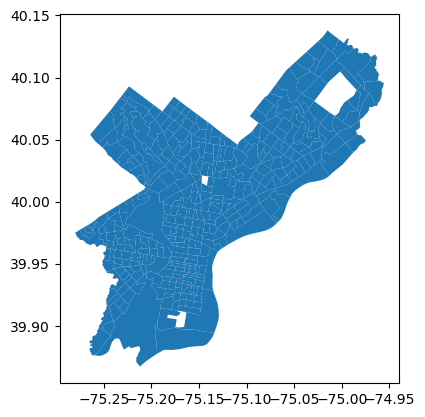

In [15]:
tracts.plot()

<AxesSubplot: >

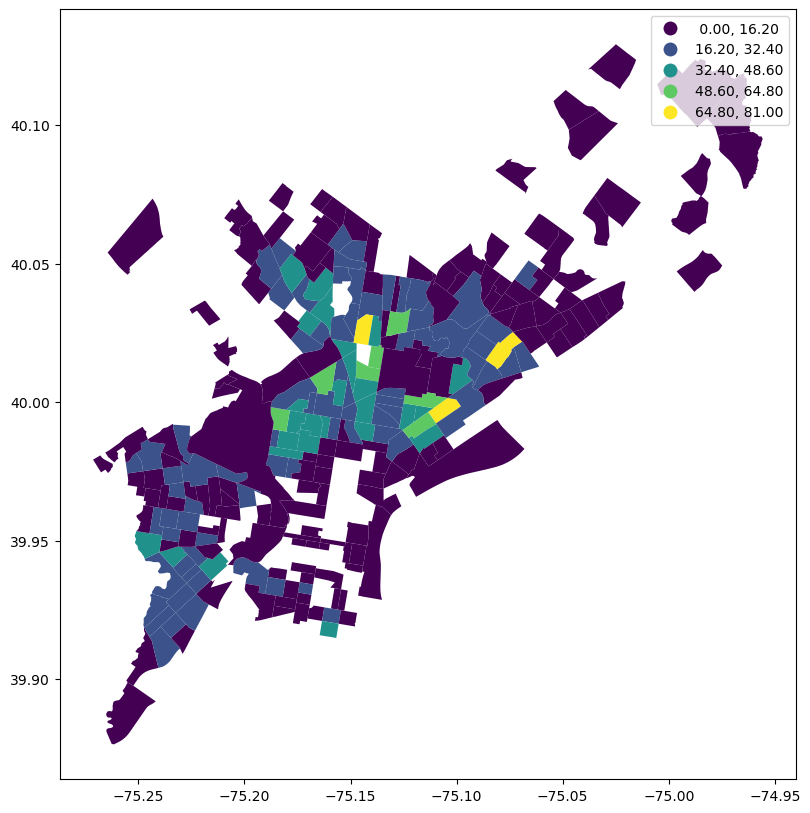

In [27]:
tracts.plot(figsize=(12,10),
                 column='bll >5',
                 legend=True, 
                 scheme='equal_interval')

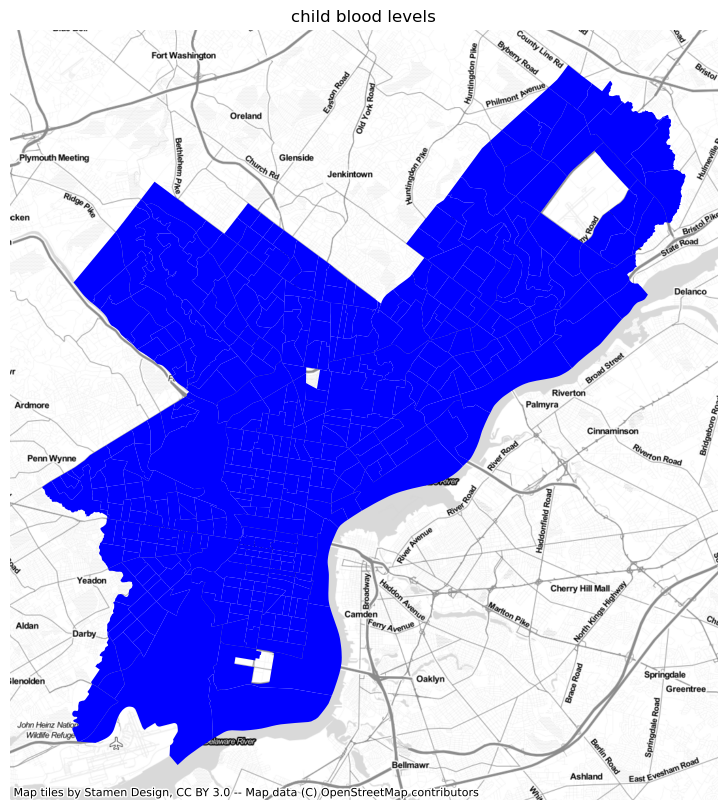

In [18]:
fig, ax = plt.subplots(figsize=(10,10))

tracts.to_crs(3857).plot(ax=ax,
marker='X',
markersize=20,
color='blue')

ax.axis('off')

ax.set_title('child blood levels')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

In [23]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts, # geo data
                  data=tracts, # data          
                  key_on='tracts.FIPS', # key, or merge column
                  columns=['FIPS', ''], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Population Black (2020)').add_to(m)    # name on the legend color bar
m

KeyError: 'tracts'